    Instructions:
    1. Press Run All (or restart kernel and run all cells).
    2. You will be prompted to provide input values.


    Task 4:
    – 4b: Implement a similar image search algorithm using this index structure storing the even numbered Caltec101
    images and a visual model of your choice (the combined visual model must have at least 256 dimensions): for a
    given query image and integer t,
        ∗ visulizes the t most similar images,
        ∗ outputs the numbers of unique and overall number of images considered during the process.

In [46]:
IMAGE_INPUT = input(
"""
Provide one of the following:
1. An Image ID in the Caltech101 dataset in range [0, 8676].
2. The name of an image file in /Code/input/ directory (eg: image.jpg).
"""
)

t = int(input("Enter t, the number of similar images t to find using LSH."))

default_config = "LSH_L10_h5_W5_resnet"

LSH_INDEX = default_config

Files already downloaded and verified
Input image:  8675


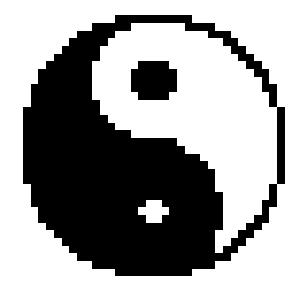

In [47]:
from utils.query_input_processor import get_query_image

image = get_query_image(IMAGE_INPUT)

print("Input image: ", IMAGE_INPUT)
display(image)

In [48]:
FEATURE_SPACE = LSH_INDEX.split('_')[-1]

if FEATURE_SPACE == 'color':
    from feature_models.color_moments import ColorMomentsExtractor

    vector = ColorMomentsExtractor(image).get_color_vector()

elif FEATURE_SPACE == 'hog':
    from feature_models.hog import HOGExtractor

    vector = HOGExtractor(image).get_hog_vector()

else:
    # ResNet feature model.
    from feature_models.resnet import ResNetExtractor
    resnet = ResNetExtractor(image)

    if FEATURE_SPACE == 'avgpool':
        vector = resnet.get_avgpool_vector()

    elif FEATURE_SPACE == 'layer3':
        vector = resnet.get_layer3_vector()

    elif FEATURE_SPACE == 'fc':
        vector = resnet.get_fc_vector()
    else:
        # resnet feature space.
        vector = resnet.get_output_vector()

In [49]:
# Retrieve LSH in memory structure to be used in later tasks.

from utils.database_utils import compressed_retrieve

lsh = compressed_retrieve(f"{LSH_INDEX}.pt")

from utils.dataset_utils import initialize_dataset
dataset = initialize_dataset()

Files already downloaded and verified


Unique considered:  191 		Total considered:  194 

1.	Image ID: 8668	Distance: 19.869619369506836


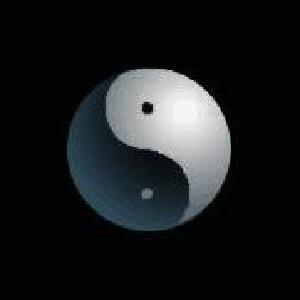

2.	Image ID: 7314	Distance: 20.14002799987793


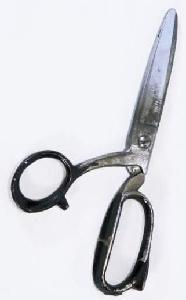

3.	Image ID: 7322	Distance: 20.288408279418945


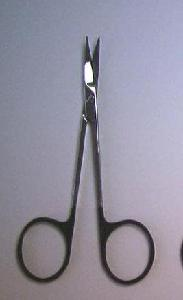

4.	Image ID: 7326	Distance: 20.308256149291992


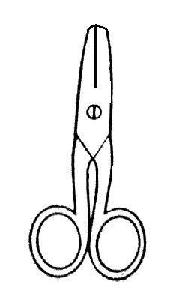

5.	Image ID: 8588	Distance: 20.74433708190918


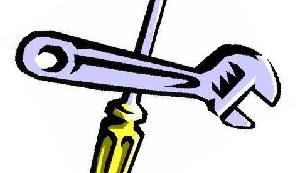

6.	Image ID: 5446	Distance: 21.480030059814453


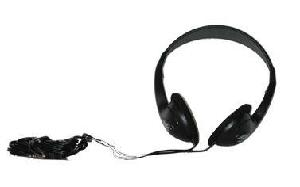

7.	Image ID: 8654	Distance: 21.66281509399414


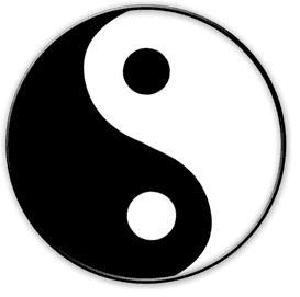

8.	Image ID: 5448	Distance: 22.037763595581055


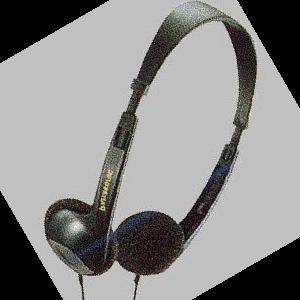

9.	Image ID: 8064	Distance: 22.178274154663086


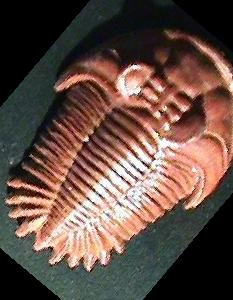

10.	Image ID: 6410	Distance: 22.65077018737793


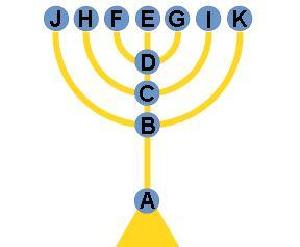

In [50]:
# Query LSH.

res, unique_considered, total_considered = lsh.query(vector, limit=t)

print("Unique considered: ", unique_considered, "\t\tTotal considered: ", total_considered, "\n")

for i, vec_tup in enumerate(res):
    print(f"{i + 1}.\tImage ID: {vec_tup[1]}\tDistance: {vec_tup[2]}")
    display(dataset[vec_tup[1]][0])